In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
path = './files/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_data = pd.read_csv(path)
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [39]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
df_data.dropna(inplace=True)

In [41]:
df_data.drop('customerID',axis=1,inplace=True)

In [42]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_4284\639740546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_4284\639740546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [43]:
df_processing = df_data.copy()

In [44]:
df_processing = pd.get_dummies(df_processing)

## Analisis de correlación

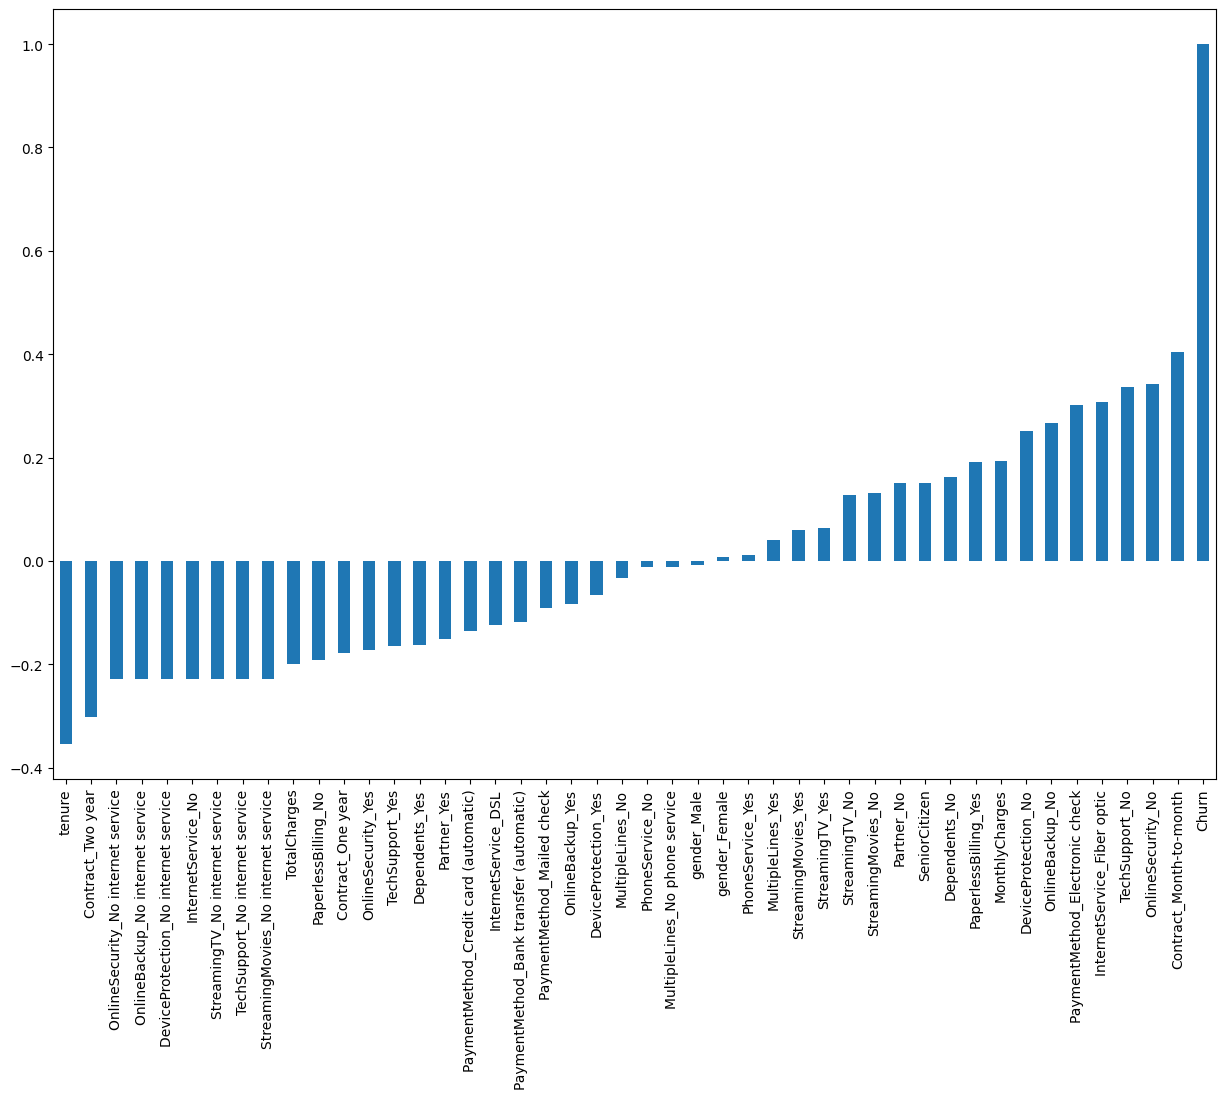

In [46]:
fig = plt.figure(figsize=(15, 10))
df_processing_corr = df_processing.corr()['Churn'].sort_values(ascending=True)
df_processing_corr.plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [49]:
scaler = MinMaxScaler()
df_processing_scaled = pd.DataFrame(scaler.fit_transform(df_processing))

In [51]:
df_processing_scaled.columns = df_processing.columns

In [52]:
df_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

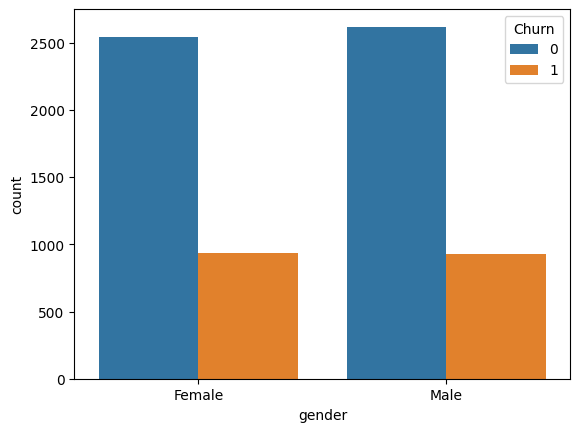

In [54]:
sns.countplot(x='gender', data=df_data, hue='Churn')
plt.show()

In [1]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10, 10))
    sns.countplot(x=column, data=df_data, hue='Churn')
    plt.show()

In [6]:
column_cat = df_data.select_dtypes(include='object').columns
column_cat

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

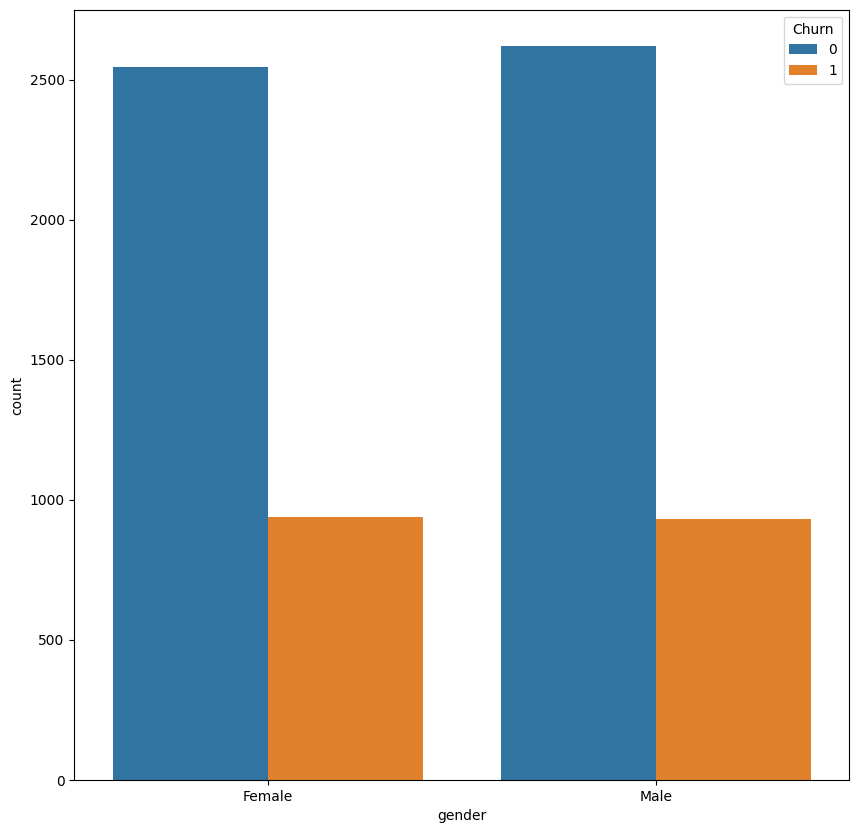

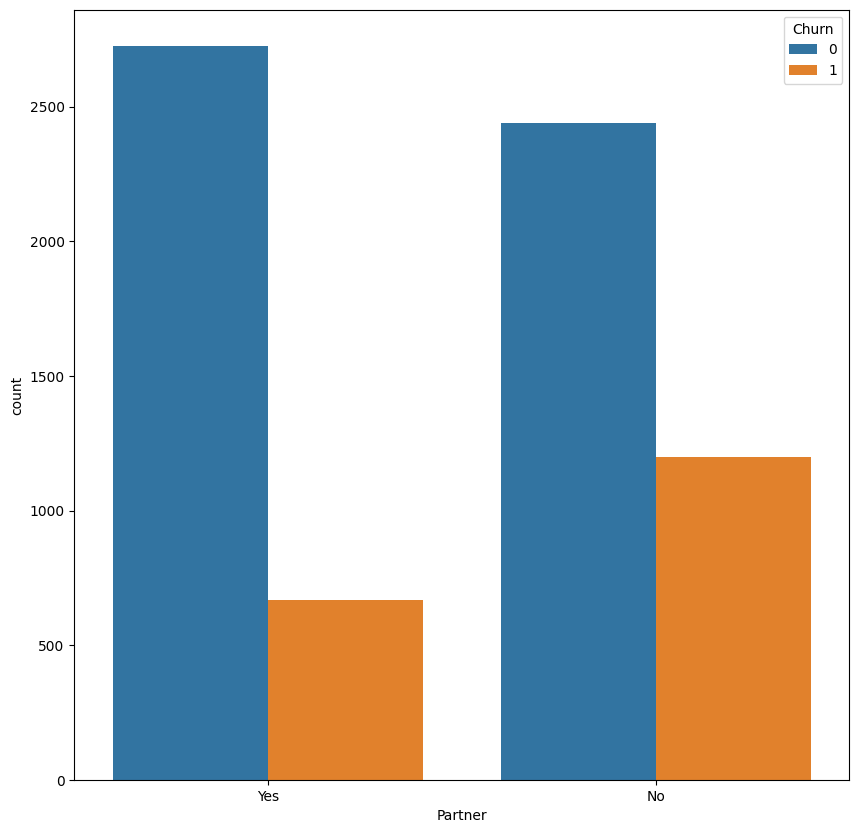

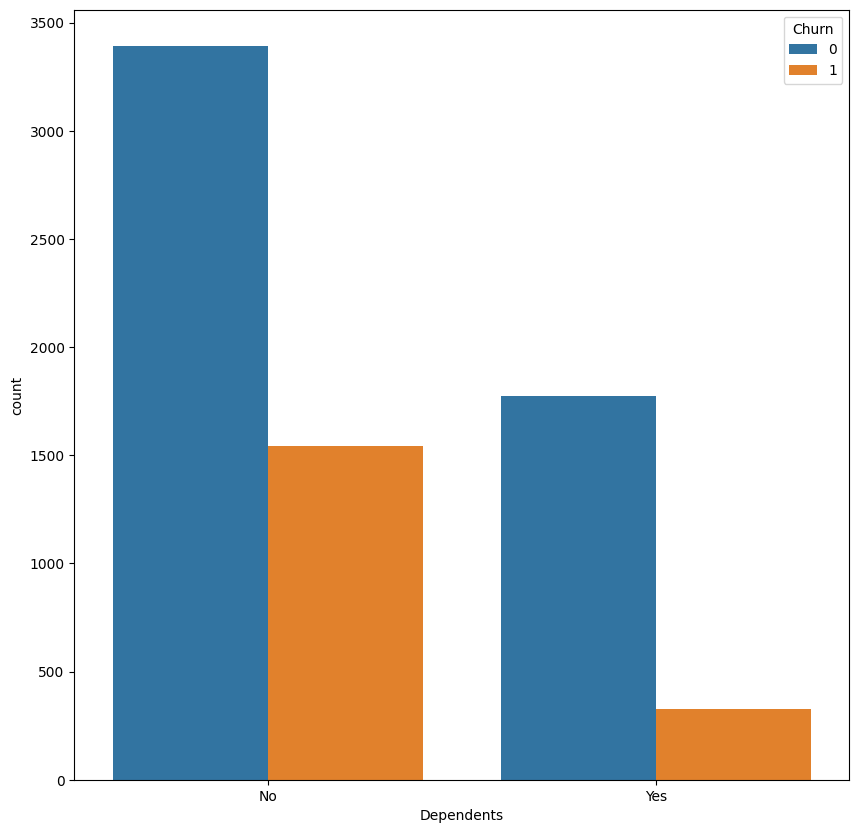

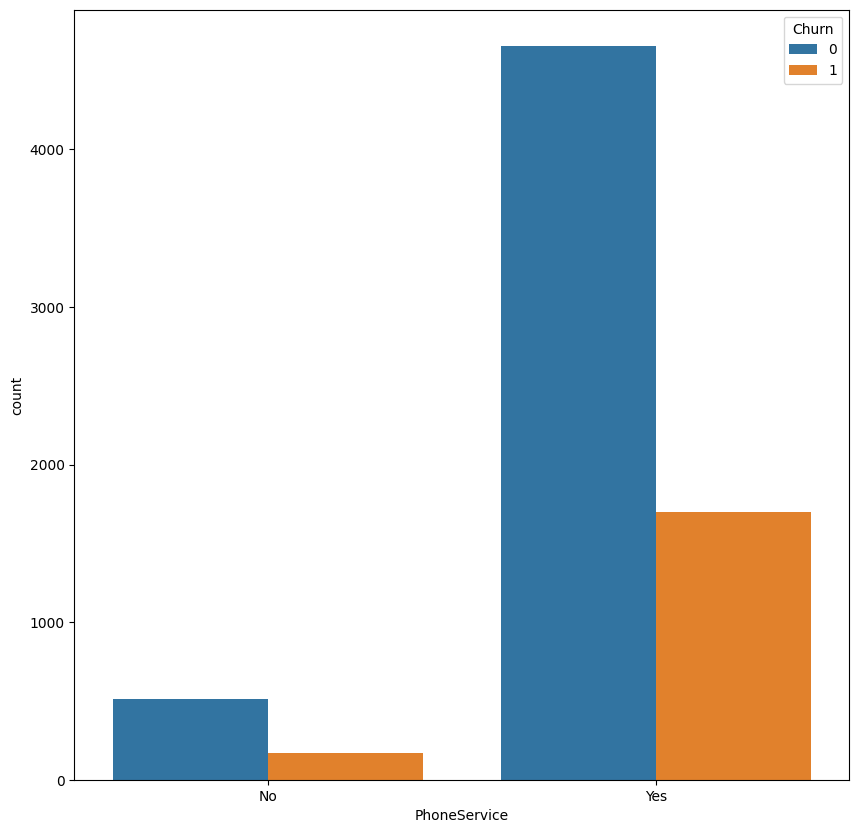

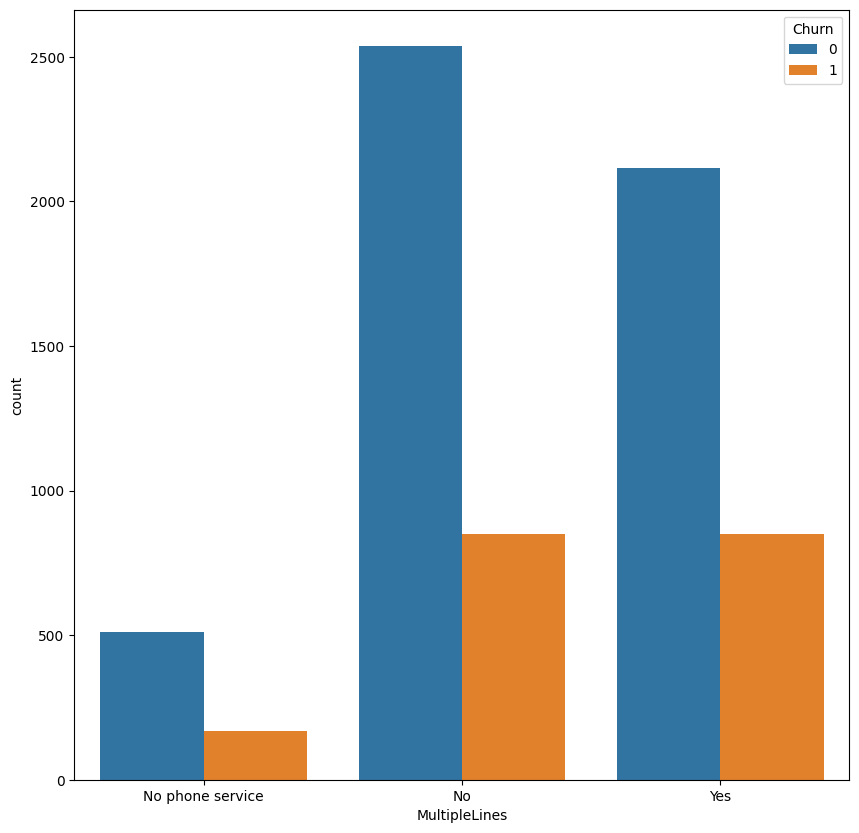

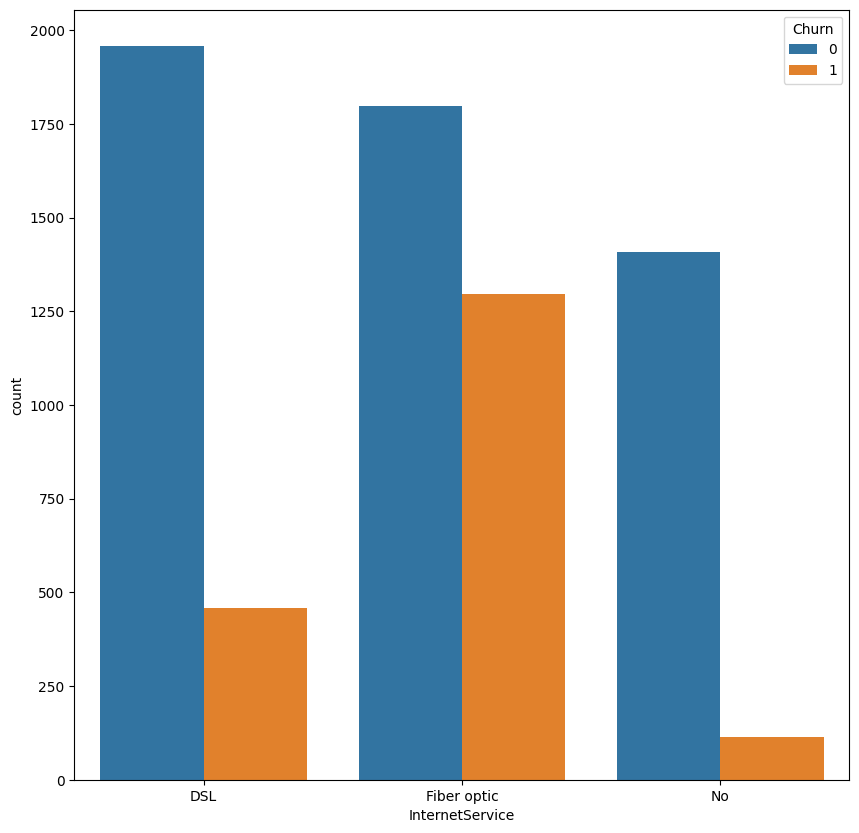

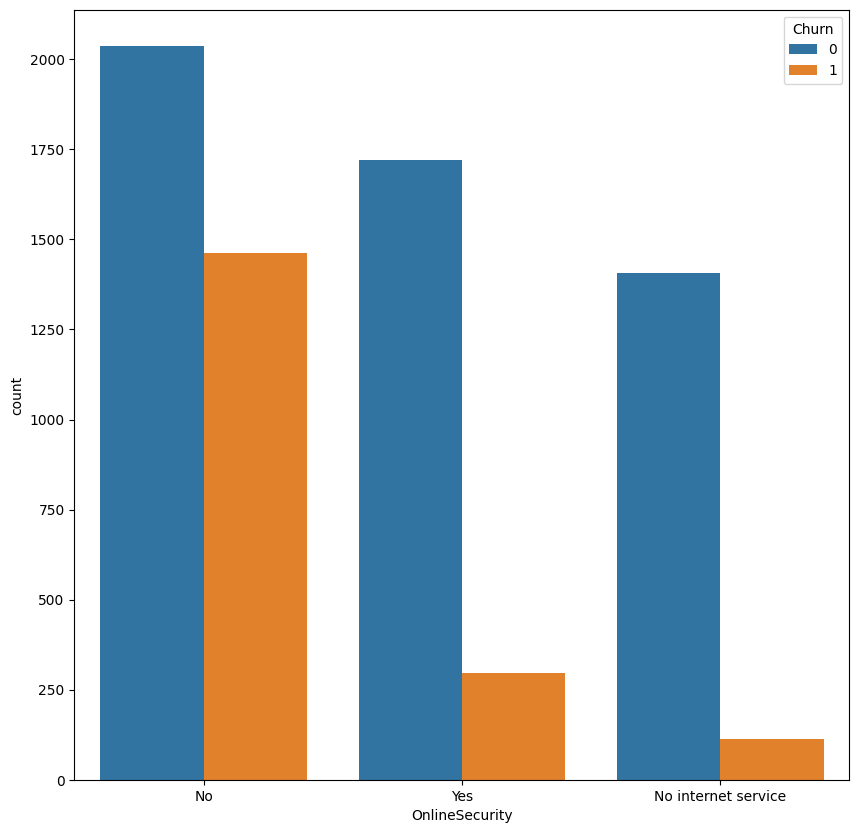

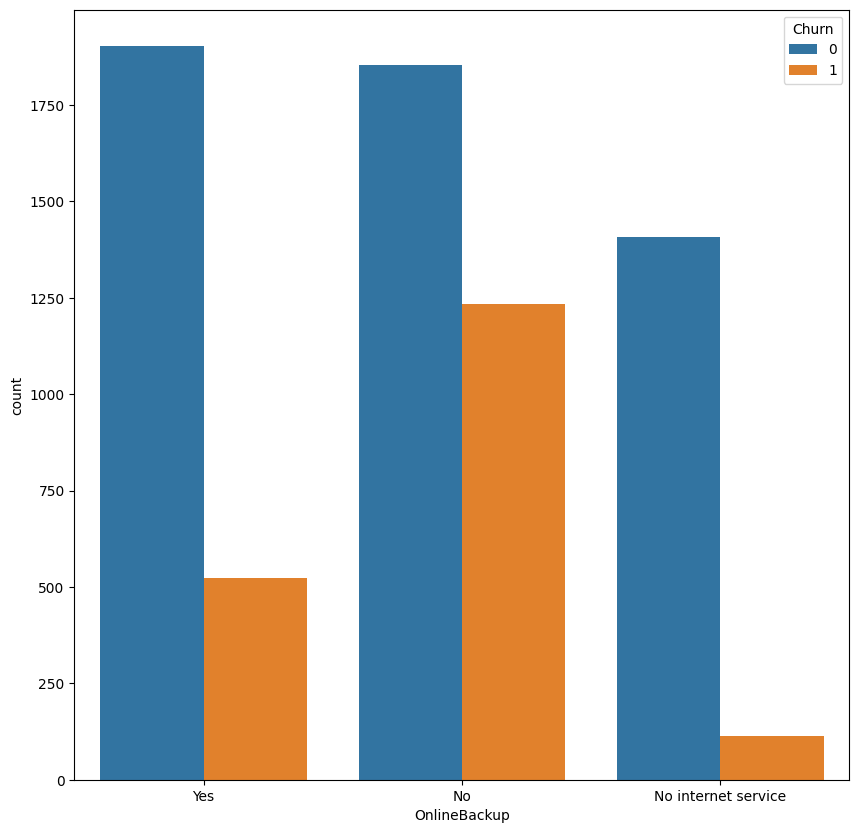

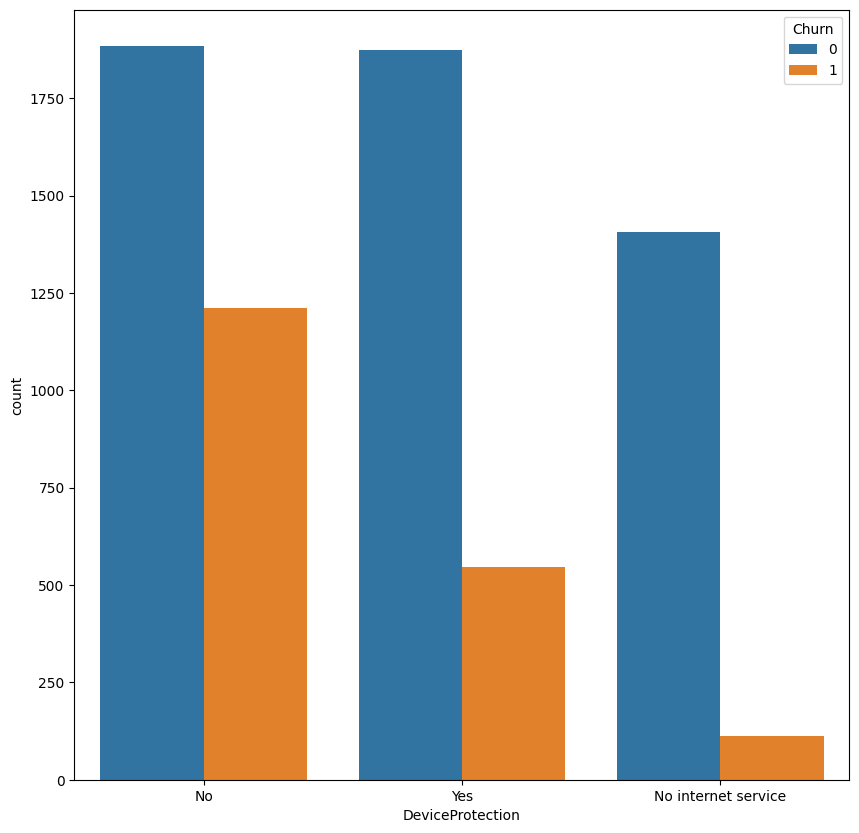

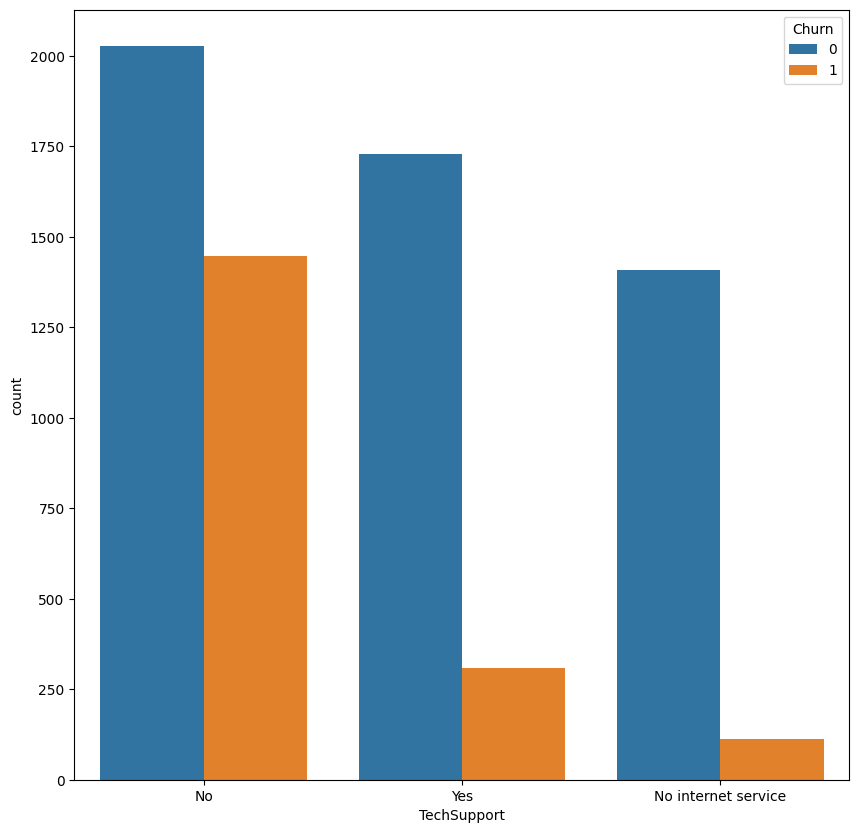

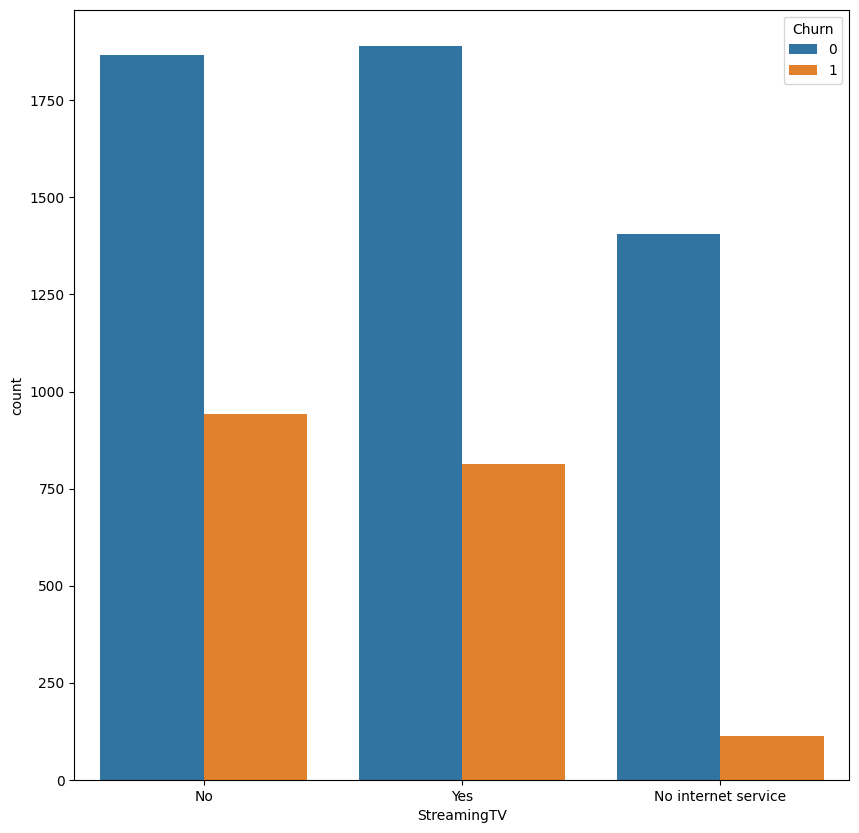

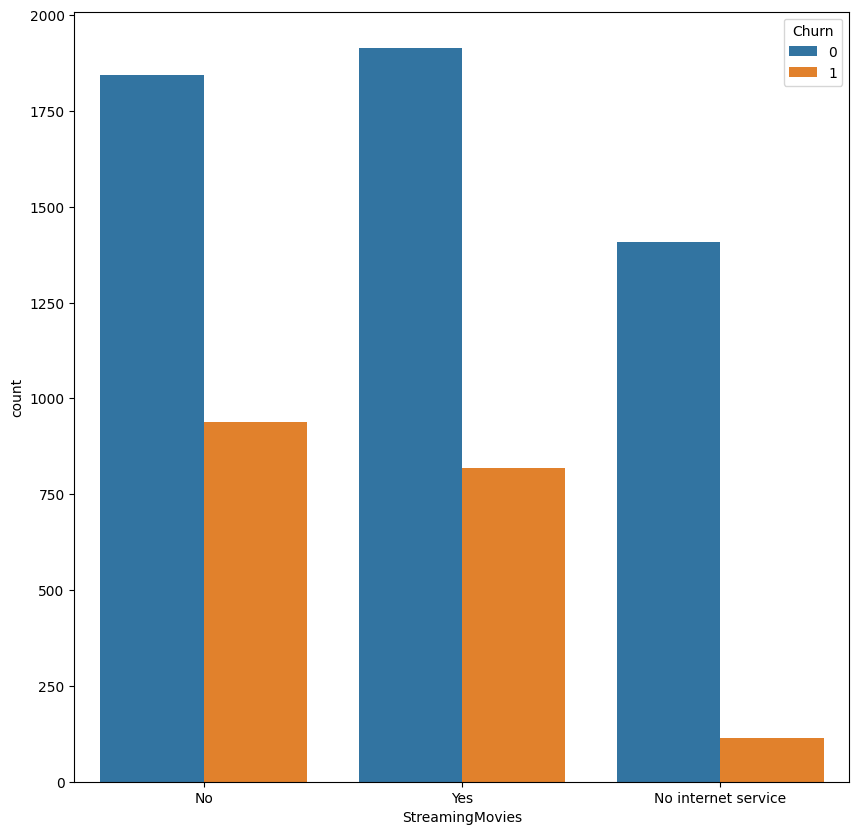

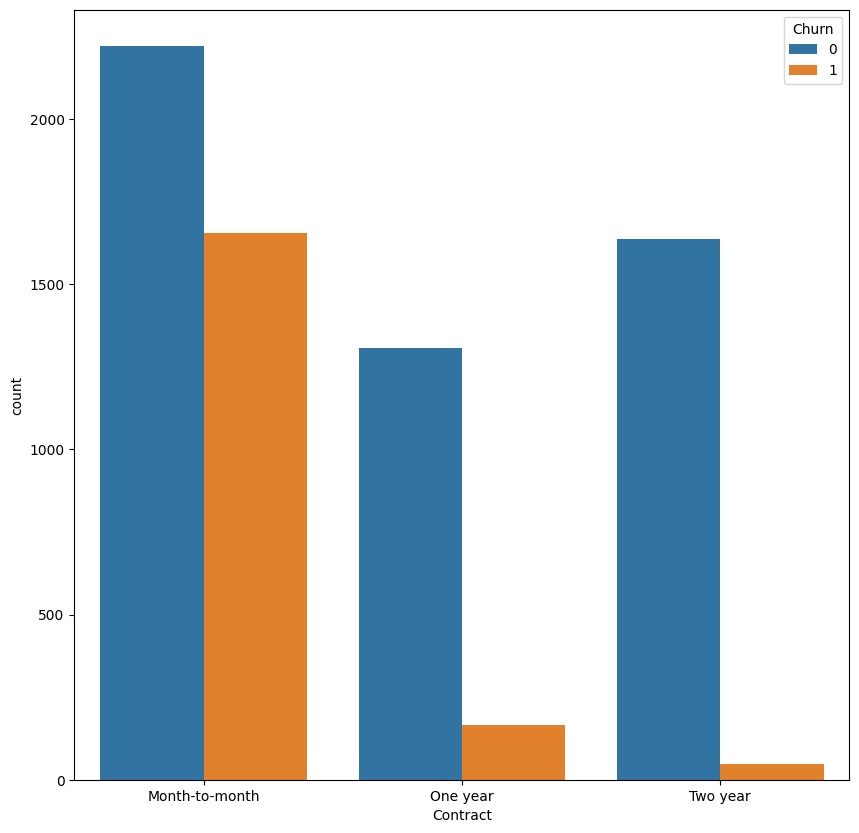

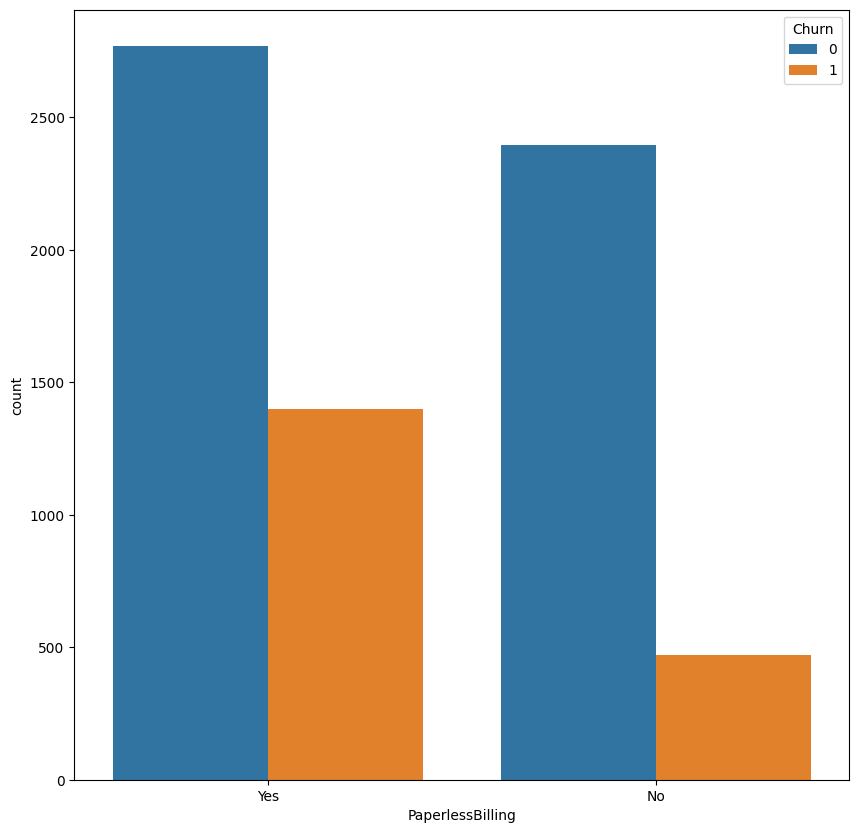

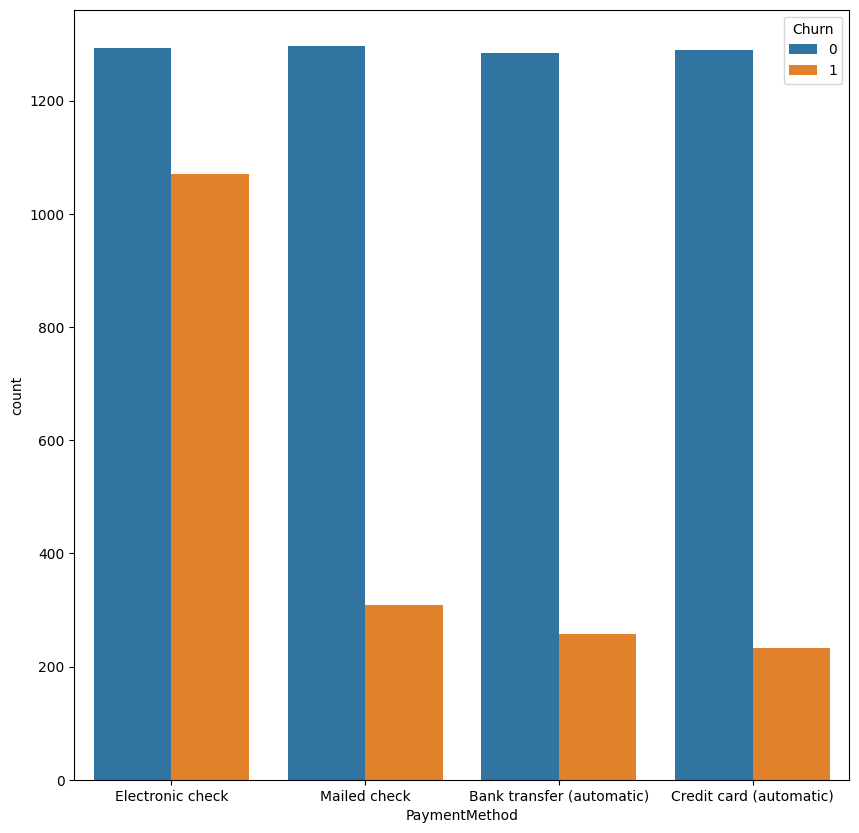

In [58]:
for i in column_cat:
    plot_categorial(i)

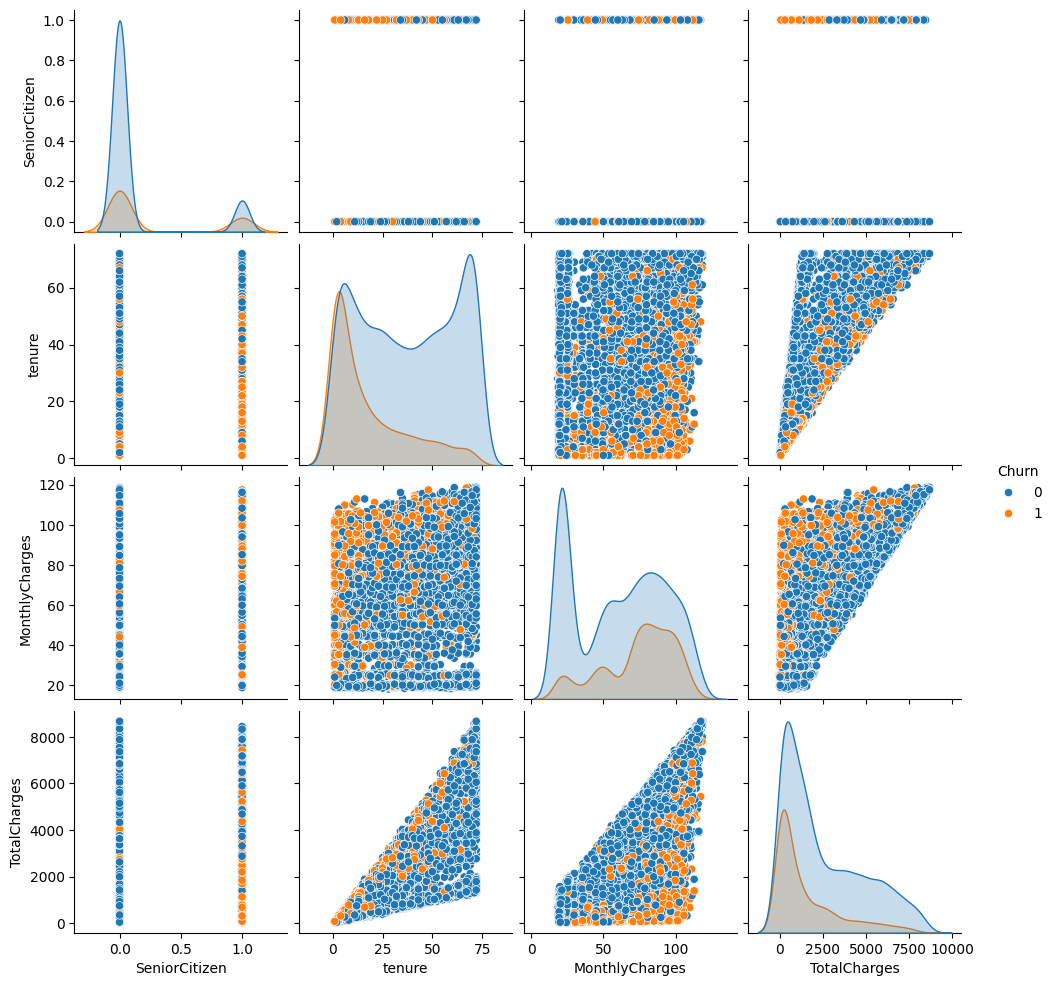

In [59]:
sns.pairplot(df_data, hue='Churn')

## Entrenamiento del modelo de regresión logística binomial

In [61]:
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 45), (2110, 45), (4922,), (2110,))

In [68]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [70]:
pred_test = model.predict(X_test)

In [71]:
print(metrics.accuracy_score(y_test, pred_test))

0.795260663507109


## Evaluación del modelo

In [72]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [73]:
model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [74]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


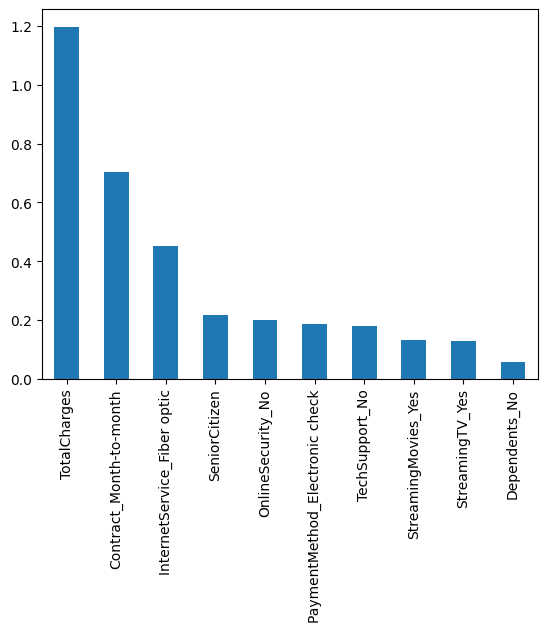

In [76]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


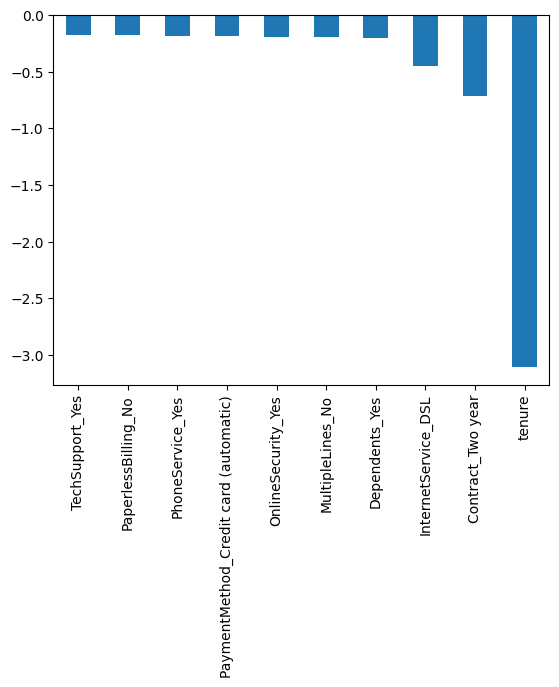

In [77]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

<Figure size 1000x700 with 0 Axes>

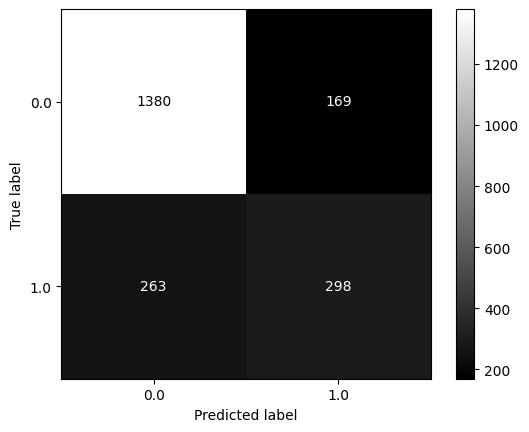

In [80]:
fig = plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')